# 1. Introduction

This case study is one part of capstone from DA course. There are 3 topics to choose and I choose the Bellabeat dataset to do analyze and find something behind this dataset. The Bellabeat is a high-tech manufacturer of health-focused products for women. I as a junior data analyst has been asked to analyze smart device data to gain insight into how consumers are using their smart devices. 

# 2. Data analysist phase

## 2.1 Ask

### **2.1.1 Stakeholder**

 - **1. Urška Sršen:** Bellabeat’s cofounder and Chief Creative Officer 
 - **2. Sando Mur:** Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
 - **3. Bellabeat marketing analytics team:** A team of data analysts responsible for collecting, analyzing, and
reporting data that helps guide Bellabeat’s marketing strategy

### **2.1.2 Business task**

The stakeholder asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. These questions
will guide your analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## 2.2 Prepare

### 2.2.1 About data

**FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius):** This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits.

**Generated** between 12 April 2016 to 12 May 2016. The habbit of user might be change.

**30 sample size** cannot represent the whole female health activities

### 2.2.2 Is data ROCC?

The good data source should be ROCC which stand for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.
1. Reliable - This dataset is not reliable since it has only 30 sample - LOW
2. Original - This dataset come from third party (MÖBIUS) - LOW
3. Comprehensive - The given parameter from this dataset quite match to Bellabeat's product - MED
4. Current - This dataset is quite old, around 7 years ago - LOW
5. Cited - This data collect from third party and don't know who they are - LOW
<br>
<br>
This dataset is quite low quality and it is not recommendation for bussiness strategy but for training part is enough 

### 2.2.3  Data selection

I choose only 5 files of 18 files from entire dataset
- "dailyActivity_merged.csv"
- "hourlyCalories_merged.csv"
- "hourlyIntensitites_merged.csv"
- "hourlySteps_merged.csv"
- "sleepDay_merged.csv"<br><br>
The rest files will not be used since they have small sample size and some duplicate columns

## 2.3 Process 

- Loading the package 

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(tidyr)
library(ggplot2)
library(viridis)
library(repr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 3.1.1       <U+221A> purrr   0.3.2  
<U+221A> tibble  2.1.1       <U+221A> dplyr   0.8.0.1
<U+221A> tidyr   0.8.3       <U+221A> stringr 1.4.0  
<U+221A> readr   1.3.1       <U+221A> forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: viridisLite


In [2]:
# To prevent day of week show in local language
Sys.setlocale("LC_TIME", "English")

[1] "English_United States.1252"

- Loadind .csv data and create dataframe 

In [3]:
daily_activity <- read_csv("Data/dailyActivity_merged.csv")
hourly_calories <- read.csv("Data/hourlyCalories_merged.csv")
hourly_intensities <- read.csv("Data/hourlyIntensities_merged.csv")
hourly_steps <- read.csv("Data/hourlySteps_merged.csv")
sleep_day <- read.csv("Data/sleepDay_merged.csv")


Parsed with column specification:
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)


- Checking data frame and columns name

In [4]:
head(daily_activity)
colnames(daily_activity)

head(hourly_calories)
colnames(hourly_calories)

head(hourly_intensities)
colnames(hourly_intensities)

head(hourly_steps)
colnames(hourly_steps)

head(sleep_day) 
colnames(sleep_day)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

Id,ActivityHour,Calories
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


[1] "Id"           "ActivityHour" "Calories"

Id,ActivityHour,TotalIntensity,AverageIntensity
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


[1] "Id"               "ActivityHour"     "TotalIntensity"   "AverageIntensity"

Id,ActivityHour,StepTotal
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


[1] "Id"           "ActivityHour" "StepTotal"

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

- Finding number of row and distinct user id from each data frame

In [5]:
nrow(daily_activity)
nrow(hourly_calories)
nrow(hourly_intensities)
nrow(hourly_steps)
nrow(sleep_day)

[1] 940

[1] 22099

[1] 22099

[1] 22099

[1] 413

- Find distinct number of user, only sleep_day has 24 user

In [6]:
n_distinct(daily_activity$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_intensities$Id)
n_distinct(hourly_steps$Id)
n_distinct(sleep_day$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

- Finding duplicate and NA that we will remove later
- Only sleep data has duplicate

In [7]:
sum(duplicated(daily_activity))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_intensities))
sum(duplicated(hourly_steps))
sum(duplicated(sleep_day))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

- Remove duplicate and NA 

In [8]:
daily_activity <- daily_activity %>% 
    drop_na()

hourly_calories <- hourly_calories %>% 
    drop_na()

hourly_intensities <- hourly_intensities %>% 
    drop_na()

hourly_steps <- hourly_steps %>% 
    drop_na()

sleep_day <- sleep_day %>% 
    drop_na() %>% 
    unique()

In [9]:
sum(duplicated(sleep_day))

[1] 0

- Check data format, in this case we will focus on date time data 
- All of date time data is character not appropiate date time format

In [10]:
glimpse(daily_activity)
glimpse(hourly_calories)
glimpse(hourly_intensities)
glimpse(hourly_steps)
glimpse(sleep_day)

Observations: 940
Variables: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396...
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/...
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13...
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, ...
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, ...
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, ...
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, ...
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, ...
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66...
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27,...
$ LightlyActiveMinut

- Date should be 'mm-dd-yyyy'
- Date will be added to new columns
- Date time will be split to two columns and be added
- Add day of week

In [11]:
daily_activity$Date <- mdy(daily_activity$ActivityDate)
daily_activity$Weekday <- weekdays(daily_activity$Date)

In [12]:
head(daily_activity)
glimpse(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date,Weekday
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12,Tuesday
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13,Wednesday
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14,Thursday
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15,Friday
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16,Saturday
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17,Sunday


Observations: 940
Variables: 17
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396...
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/...
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13...
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, ...
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, ...
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, ...
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, ...
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, ...
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66...
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27,...
$ LightlyActiveMinut

In [13]:
hourly_calories$DateTime <- mdy_hms(hourly_calories$ActivityHour)
hourly_calories <- hourly_calories %>% 
  separate(DateTime, c("Date", "Time"), sep= " ")
hourly_calories$Date <- as.Date(hourly_calories$Date, format="%Y-%m-%d") 
hourly_calories$Weekday <- weekdays(hourly_calories$Date)
# hourly_calories$Time <- chron(times = hourly_calories$Time)
head(hourly_calories)
glimpse(hourly_calories)

Id,ActivityHour,Calories,Date,Time,Weekday
1503960366,4/12/2016 12:00:00 AM,81,2016-04-12,00:00:00,Tuesday
1503960366,4/12/2016 1:00:00 AM,61,2016-04-12,01:00:00,Tuesday
1503960366,4/12/2016 2:00:00 AM,59,2016-04-12,02:00:00,Tuesday
1503960366,4/12/2016 3:00:00 AM,47,2016-04-12,03:00:00,Tuesday
1503960366,4/12/2016 4:00:00 AM,48,2016-04-12,04:00:00,Tuesday
1503960366,4/12/2016 5:00:00 AM,48,2016-04-12,05:00:00,Tuesday


Observations: 22,099
Variables: 6
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396...
$ ActivityHour <fct> 4/12/2016 12:00:00 AM, 4/12/2016 1:00:00 AM, 4/12/2016...
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 6...
$ Date         <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2016-...
$ Time         <chr> "00:00:00", "01:00:00", "02:00:00", "03:00:00", "04:00...
$ Weekday      <chr> "Tuesday", "Tuesday", "Tuesday", "Tuesday", "Tuesday",...


In [14]:
hourly_intensities$DateTime <- mdy_hms(hourly_intensities$ActivityHour)
hourly_intensities <- hourly_intensities %>% 
  separate(DateTime, c("Date", "Time"), sep= " ")
hourly_intensities$Date <- as.Date(hourly_intensities$Date, format="%Y-%m-%d") 
hourly_intensities$Weekday <- weekdays(hourly_intensities$Date)
#hourly_intensities$Time <- chron(times = hourly_intensities$Time)
head(hourly_intensities)
glimpse(hourly_intensities)

Id,ActivityHour,TotalIntensity,AverageIntensity,Date,Time,Weekday
1503960366,4/12/2016 12:00:00 AM,20,0.333333,2016-04-12,00:00:00,Tuesday
1503960366,4/12/2016 1:00:00 AM,8,0.133333,2016-04-12,01:00:00,Tuesday
1503960366,4/12/2016 2:00:00 AM,7,0.116667,2016-04-12,02:00:00,Tuesday
1503960366,4/12/2016 3:00:00 AM,0,0.000000,2016-04-12,03:00:00,Tuesday
1503960366,4/12/2016 4:00:00 AM,0,0.000000,2016-04-12,04:00:00,Tuesday
1503960366,4/12/2016 5:00:00 AM,0,0.000000,2016-04-12,05:00:00,Tuesday


Observations: 22,099
Variables: 7
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15...
$ ActivityHour     <fct> 4/12/2016 12:00:00 AM, 4/12/2016 1:00:00 AM, 4/12/...
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36...
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, ...
$ Date             <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2...
$ Time             <chr> "00:00:00", "01:00:00", "02:00:00", "03:00:00", "0...
$ Weekday          <chr> "Tuesday", "Tuesday", "Tuesday", "Tuesday", "Tuesd...


In [15]:
hourly_steps$DateTime <- mdy_hms(hourly_steps$ActivityHour)
hourly_steps <- hourly_steps %>% 
  separate(DateTime, c("Date", "Time"), sep= " ")
hourly_steps$Date <- as.Date(hourly_steps$Date, format="%Y-%m-%d") 
hourly_steps$Weekday <- weekdays(hourly_steps$Date)
#hourly_steps$Time <- chron(times = hourly_steps$Time)
head(hourly_steps)
glimpse(hourly_steps)

Id,ActivityHour,StepTotal,Date,Time,Weekday
1503960366,4/12/2016 12:00:00 AM,373,2016-04-12,00:00:00,Tuesday
1503960366,4/12/2016 1:00:00 AM,160,2016-04-12,01:00:00,Tuesday
1503960366,4/12/2016 2:00:00 AM,151,2016-04-12,02:00:00,Tuesday
1503960366,4/12/2016 3:00:00 AM,0,2016-04-12,03:00:00,Tuesday
1503960366,4/12/2016 4:00:00 AM,0,2016-04-12,04:00:00,Tuesday
1503960366,4/12/2016 5:00:00 AM,0,2016-04-12,05:00:00,Tuesday


Observations: 22,099
Variables: 6
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396...
$ ActivityHour <fct> 4/12/2016 12:00:00 AM, 4/12/2016 1:00:00 AM, 4/12/2016...
$ StepTotal    <int> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253...
$ Date         <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2016-...
$ Time         <chr> "00:00:00", "01:00:00", "02:00:00", "03:00:00", "04:00...
$ Weekday      <chr> "Tuesday", "Tuesday", "Tuesday", "Tuesday", "Tuesday",...


In [16]:
sleep_day$Date <-  mdy_hms(sleep_day$SleepDay)
sleep_day$Weekday <- weekdays(sleep_day$Date)
head(sleep_day)
glimpse(sleep_day)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Weekday
1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,Tuesday
1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,Wednesday
1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,Friday
1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,Saturday
1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,Sunday
1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,Tuesday


Observations: 410
Variables: 7
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, ...
$ SleepDay           <fct> 4/12/2016 12:00:00 AM, 4/13/2016 12:00:00 AM, 4/...
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430...
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449...
$ Date               <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16,...
$ Weekday            <chr> "Tuesday", "Wednesday", "Friday", "Saturday", "S...


# # 2.4 Analyze

- Find minimum and maximum date from these datasets 
- The result show that all dataset has the same start date and end date

In [17]:
min(daily_activity$Date)
max(daily_activity$Date)

min(hourly_calories$Date)
max(hourly_calories$Date)

min(hourly_intensities$Date)
max(hourly_intensities$Date)

min(hourly_steps$Date)
max(hourly_steps$Date)

min(sleep_day$Date)
max(sleep_day$Date)


[1] "2016-04-12"

[1] "2016-05-12"

[1] "2016-04-12"

[1] "2016-05-12"

[1] "2016-04-12"

[1] "2016-05-12"

[1] "2016-04-12"

[1] "2016-05-12"

[1] "2016-04-12 UTC"

[1] "2016-05-12 UTC"

- Exploreing from each dataset

- Users took 8319 step/day and burned 2361 kcal in average 

In [18]:
daily_activity %>% 
  filter(TotalSteps != 0)  %>% 
  select(TotalSteps, Calories) %>% 
  summary()

   TotalSteps       Calories   
 Min.   :    4   Min.   :  52  
 1st Qu.: 4923   1st Qu.:1856  
 Median : 8053   Median :2220  
 Mean   : 8319   Mean   :2361  
 3rd Qu.:11092   3rd Qu.:2832  
 Max.   :36019   Max.   :4900  

- SedentaryMinutes is higest compare to other
- Almost time is inactive, should be alert to user to say "be active" 

In [19]:
daily_activity %>%  
  select(SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes) %>% 
  summary()

 SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes VeryActiveMinutes
 Min.   :   0.0   Min.   :  0.0        Min.   :  0.00      Min.   :  0.00   
 1st Qu.: 729.8   1st Qu.:127.0        1st Qu.:  0.00      1st Qu.:  0.00   
 Median :1057.5   Median :199.0        Median :  6.00      Median :  4.00   
 Mean   : 991.2   Mean   :192.8        Mean   : 13.56      Mean   : 21.16   
 3rd Qu.:1229.5   3rd Qu.:264.0        3rd Qu.: 19.00      3rd Qu.: 32.00   
 Max.   :1440.0   Max.   :518.0        Max.   :143.00      Max.   :210.00   

- Users sleep 1 time in everage
- More than 1 time imply that they took a nap
- Users took 458.5 minute (7.6 hour) on the bed and took 419.2 minute (6.9 hour) to fall asleep

In [20]:
sleep_day %>% 
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>% 
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

- Merging data between activity daily and sleep for both inner and outer

In [67]:
#Not used
merged_outer <- merge(daily_activity, sleep_day, by= c("Id" = "Id", "Date" = "Date"), all = TRUE)
merged_inner <- merge(daily_activity, sleep_day, by= c("Id" = "Id", "Date" = "Date"))


In [23]:
nrow(merged_outer)
nrow(merged_inner)

n_distinct(merged_outer$Id)
n_distinct(merged_inner$Id)

[1] 940

[1] 410

[1] 33

[1] 24

# # 2.5 Share

Daily data

In [24]:
total_steps_days <- daily_activity %>% 
    filter(TotalSteps !=0) %>% 
    group_by(Weekday) %>% 
    mutate(Day = factor(Weekday, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))) %>% 
    summarize(avg_total_steps = mean(TotalSteps))
head(total_steps_days)

Weekday,avg_total_steps
Friday,7820.642
Monday,8488.218
Saturday,8946.628
Sunday,7626.555
Thursday,8185.398
Tuesday,8949.283


- The result shows that user most active on Saturday and least active on Sunday
- It imply that user pay attention to take a rest on Sunday 

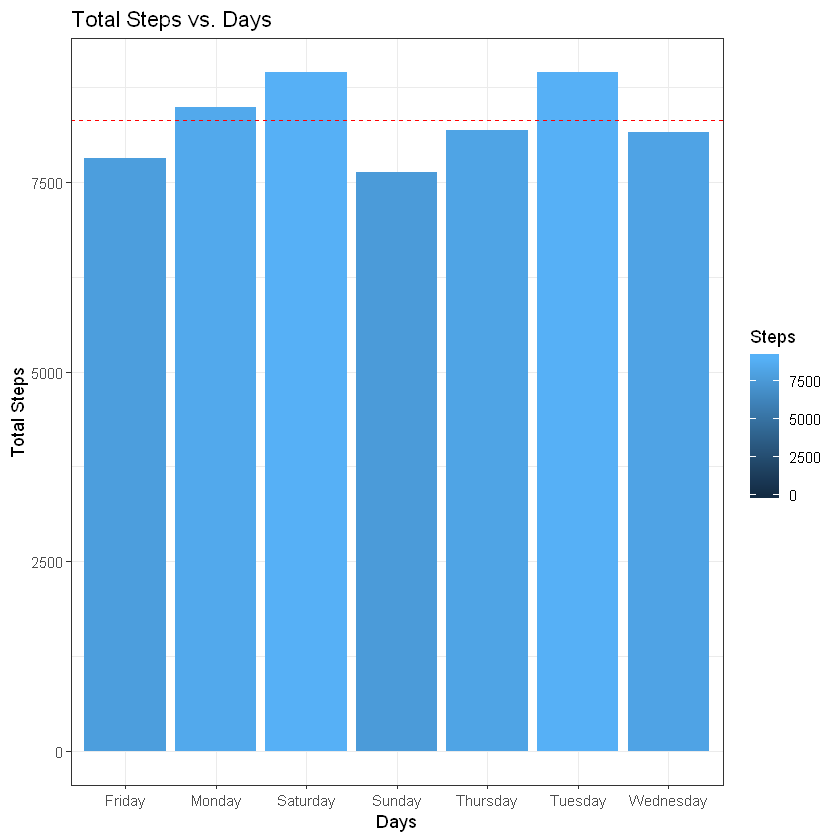

In [25]:
ggplot(total_steps_days, aes(x = Weekday, y = avg_total_steps)) +
    geom_bar(stat = "identity", aes(fill = avg_total_steps)) +
    scale_fill_continuous(limits = c(0, 9000)) + 
    geom_hline(yintercept = mean(total_steps_days$avg_total_steps), linetype="dashed", color = "red") +
    theme_bw() +
    labs(title = "Total Steps vs. Days", x = "Days", y = "Total Steps", fill = "Steps")

In [26]:
calories_days <- daily_activity %>% 
    group_by(Weekday) %>% 
    mutate(Day = factor(Weekday, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))) %>% 
    summarize(avg_calories = mean(Calories))
head(calories_days)

Weekday,avg_calories
Friday,2331.786
Monday,2324.208
Saturday,2354.968
Sunday,2263.000
Thursday,2199.571
Tuesday,2356.013


- The most burning of calories is on Saturday similay to most step

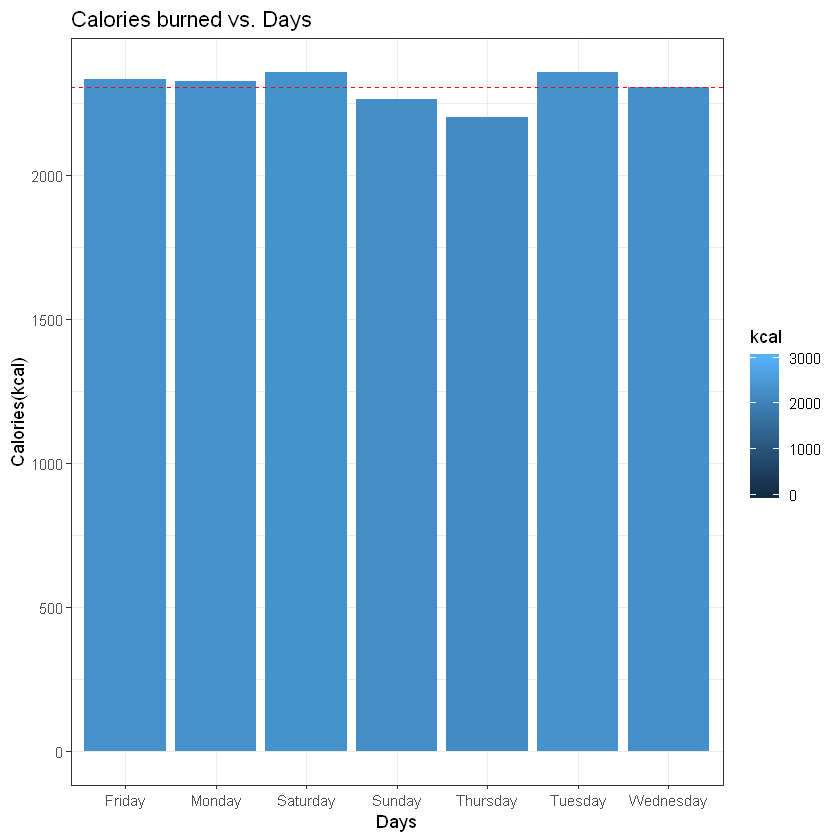

In [27]:
ggplot(calories_days, aes(x = Weekday, y = avg_calories)) +
    geom_bar(stat = "identity", aes(fill = avg_calories)) +
    scale_fill_continuous(limits = c(0, 3000)) + 
    geom_hline(yintercept = mean(calories_days$avg_calories), linetype="dashed", color = "red") +
    theme_bw() +
    labs(title = "Calories burned vs. Days", x = "Days", y = "Calories(kcal)", fill = "kcal")

In [42]:
total_min_active <- daily_activity %>% 
    summarise(total_min = sum(daily_activity$SedentaryMinutes) + sum(daily_activity$LightlyActiveMinutes) + sum(daily_activity$FairlyActiveMinutes) + sum(daily_activity$VeryActiveMinutes))
total_min_active

total_min
1145628


In [51]:
total_min_active$total_min

[1] 1145628

In [53]:
percentage <- data.frame(
  level=c("Sedentary", "Lightly", "Fairly", "Very Active"),
  minutes=c(sum(daily_activity$SedentaryMinutes), sum(daily_activity$LightlyActiveMinutes), sum(daily_activity$FairlyActiveMinutes), sum(daily_activity$VeryActiveMinutes)),
  Percent=c(sum(daily_activity$SedentaryMinutes)/total_min_active$total_min*100, sum(daily_activity$LightlyActiveMinutes)/total_min_active$total_min*100, sum(daily_activity$FairlyActiveMinutes)/total_min_active$total_min*100, sum(daily_activity$VeryActiveMinutes)/total_min_active$total_min*100)  
)
percentage

level,minutes,Percent
Sedentary,931738,81.329891
Lightly,181244,15.820493
Fairly,12751,1.113014
Very Active,19895,1.736602


- In term of activities group user are most Sedentary compared to other 

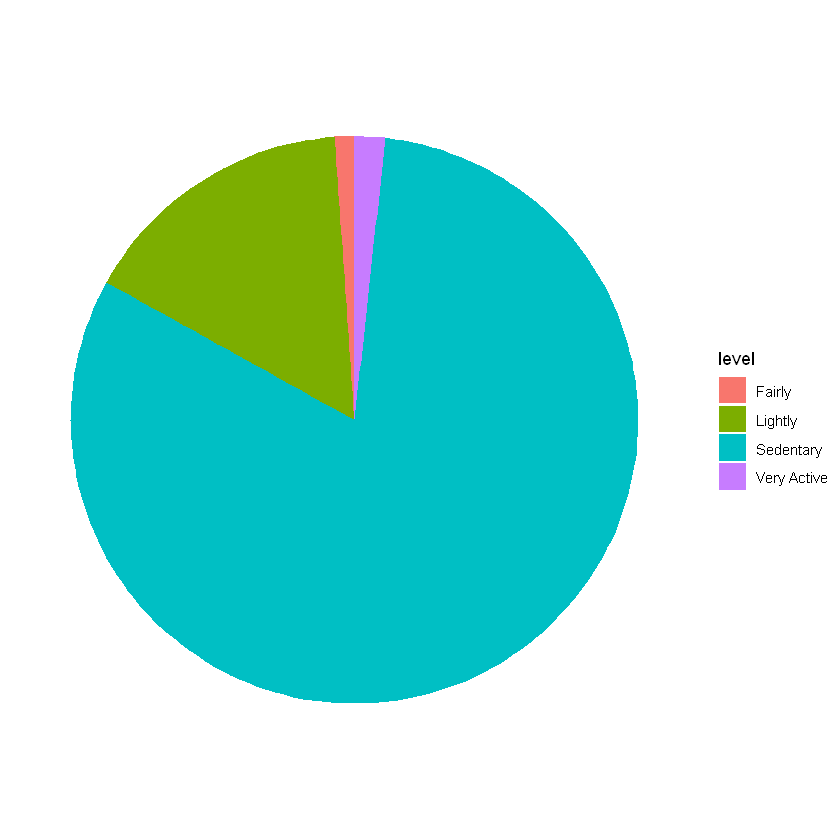

In [54]:
ggplot(percentage, aes(x="", y=Percent, fill=level)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)+
  theme_void()

In [55]:
sleep_day2 <- sleep_day %>% 
    group_by(Weekday) %>% 
    mutate(Day = factor(Weekday, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))) %>% 
    summarize(avg_sleep = mean(TotalMinutesAsleep))
head(sleep_day2)

Weekday,avg_sleep
Friday,405.4211
Monday,419.5000
Saturday,419.0702
Sunday,452.7455
Thursday,401.2969
Tuesday,404.5385


- The result show that sleep time in each day is similay to average around 7 hours.
- The sleep time is enough but need to find sleep quality to recheck again
- Some user didn't wear smart device during sleep time 

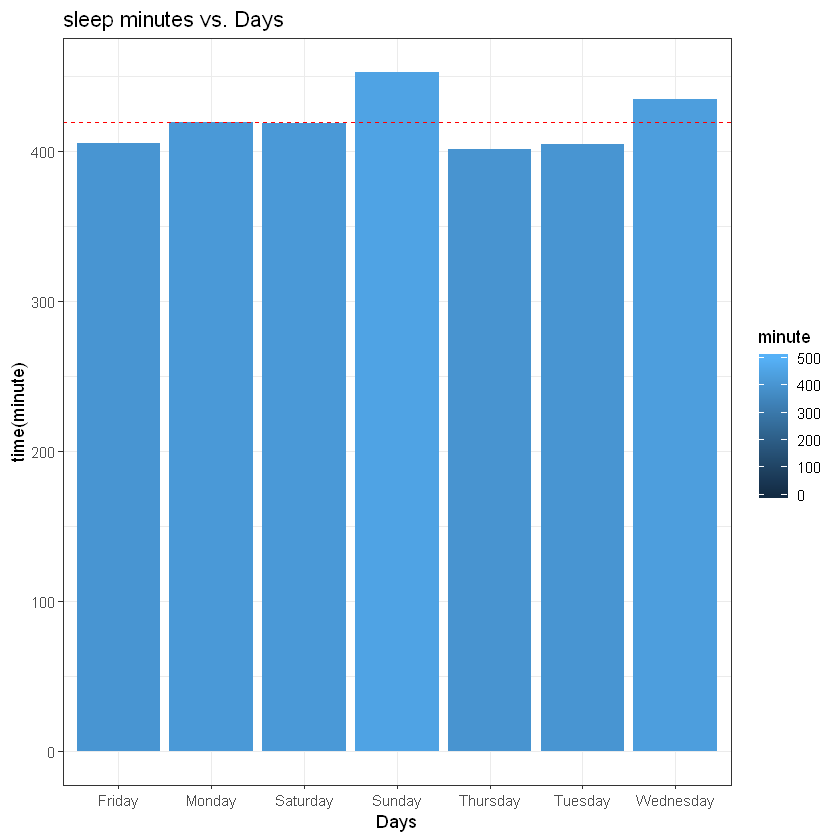

In [30]:
ggplot(sleep_day2, aes(x = Weekday, y = avg_sleep)) +
    geom_bar(stat = "identity", aes(fill = avg_sleep)) +
    scale_fill_continuous(limits = c(0, 500)) + 
    geom_hline(yintercept = mean(sleep_day2$avg_sleep), linetype="dashed", color = "red") +
    theme_bw() +
    labs(title = "sleep minutes vs. Days", x = "Days", y = "time(minute)", fill = "minute")

Hourly data

In [31]:
hourly_steps2 <- hourly_steps %>% 
    group_by(Time) %>%     summarize(avg_step_total = mean(StepTotal))
head(hourly_steps2)

Time,avg_step_total
00:00:00,42.188437
01:00:00,23.102894
02:00:00,17.110397
03:00:00,6.426581
04:00:00,12.699571
05:00:00,43.869099


- The 3 most taken step is 17:00 to 19:00
- It can imply that user wear smart device during way back home or do some excercise after work time.

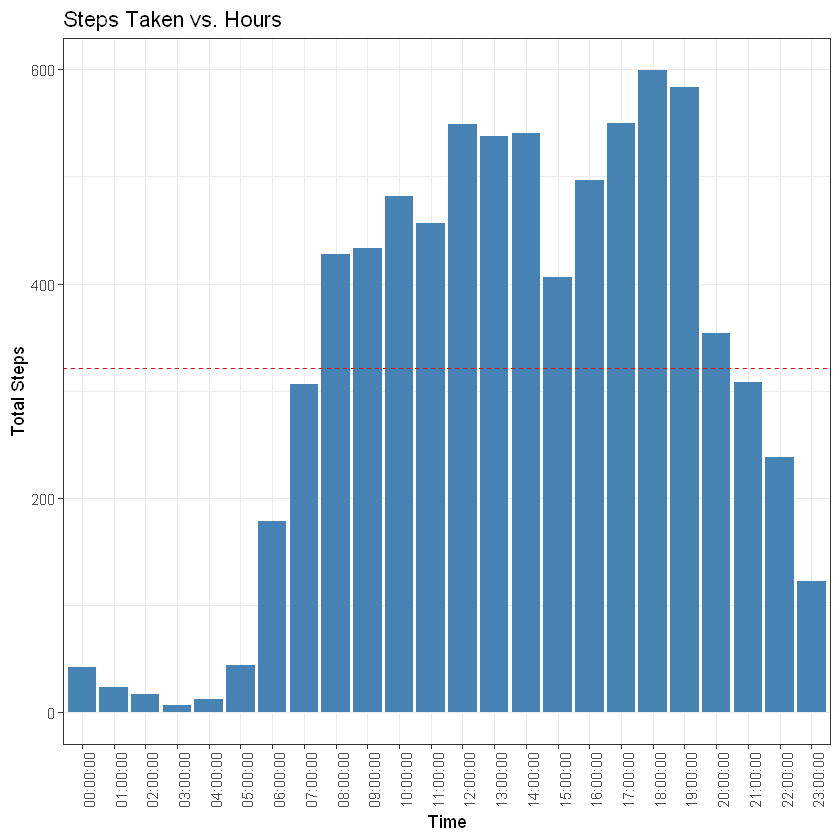

In [32]:
ggplot(hourly_steps2, aes(x = Time, y = avg_step_total)) + 
    geom_bar(stat = "identity", fill = "steelblue") +
    geom_hline(yintercept = mean(hourly_steps2$avg_step_total), linetype="dashed", color = "red") +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 90)) +
    labs(title = "Steps Taken vs. Hours", x = "Time", y = "Total Steps" )

In [33]:
head(hourly_calories)

Id,ActivityHour,Calories,Date,Time,Weekday
1503960366,4/12/2016 12:00:00 AM,81,2016-04-12,00:00:00,Tuesday
1503960366,4/12/2016 1:00:00 AM,61,2016-04-12,01:00:00,Tuesday
1503960366,4/12/2016 2:00:00 AM,59,2016-04-12,02:00:00,Tuesday
1503960366,4/12/2016 3:00:00 AM,47,2016-04-12,03:00:00,Tuesday
1503960366,4/12/2016 4:00:00 AM,48,2016-04-12,04:00:00,Tuesday
1503960366,4/12/2016 5:00:00 AM,48,2016-04-12,05:00:00,Tuesday


In [34]:
hourly_intensities2 <- hourly_intensities %>% 
    group_by(Time) %>%     summarize(avg_intensities = mean(AverageIntensity))
head(hourly_intensities2)

Time,avg_intensities
00:00:00,0.035492524
01:00:00,0.023651328
02:00:00,0.017399091
03:00:00,0.007395519
04:00:00,0.010550802
05:00:00,0.082510751


- Same trend like step walk, this means two data have corelation

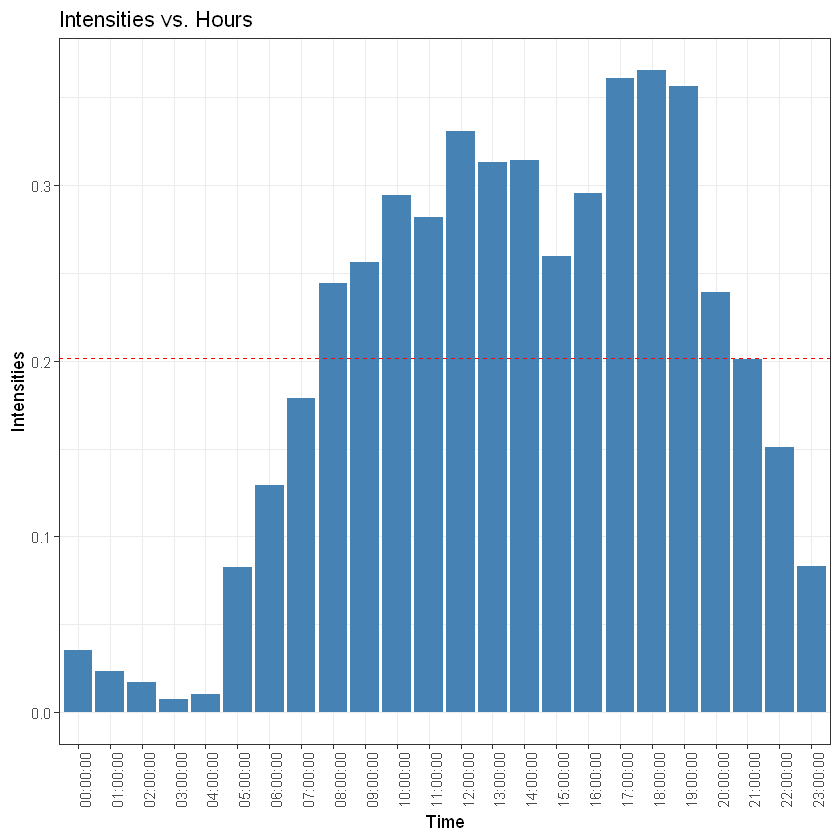

In [35]:
ggplot(hourly_intensities2, aes(x = Time, y = avg_intensities)) + 
    geom_bar(stat = "identity", fill = "steelblue") +
    geom_hline(yintercept = mean(hourly_intensities2$avg_intensities), linetype="dashed", color = "red") +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 90)) +
    labs(title = "Intensities vs. Hours", x = "Time", y = "Intensities" )

In [36]:
hourly_calories2 <- hourly_calories %>% 
    group_by(Time) %>%     summarize(avg_calories = mean(Calories))
head(hourly_calories2)

Time,avg_calories
00:00:00,71.80514
01:00:00,70.16506
02:00:00,69.18650
03:00:00,67.53805
04:00:00,68.26180
05:00:00,81.70815


- This data also correlate with walking step

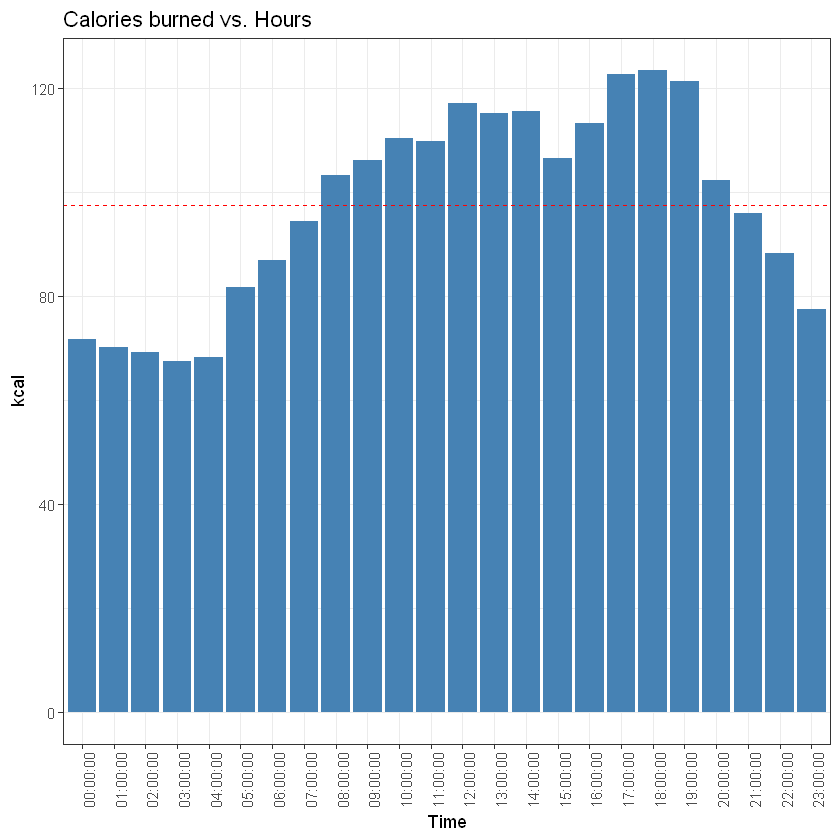

In [37]:
ggplot(hourly_calories2, aes(x = Time, y = avg_calories)) + 
    geom_bar(stat = "identity", fill = "steelblue") +
    geom_hline(yintercept = mean(hourly_calories2$avg_calories), linetype="dashed", color = "red") +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 90)) +
    labs(title = "Calories burned vs. Hours", x = "Time", y = "kcal" )

- To cross check, the stps and calories burned have positive corelation like we known.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


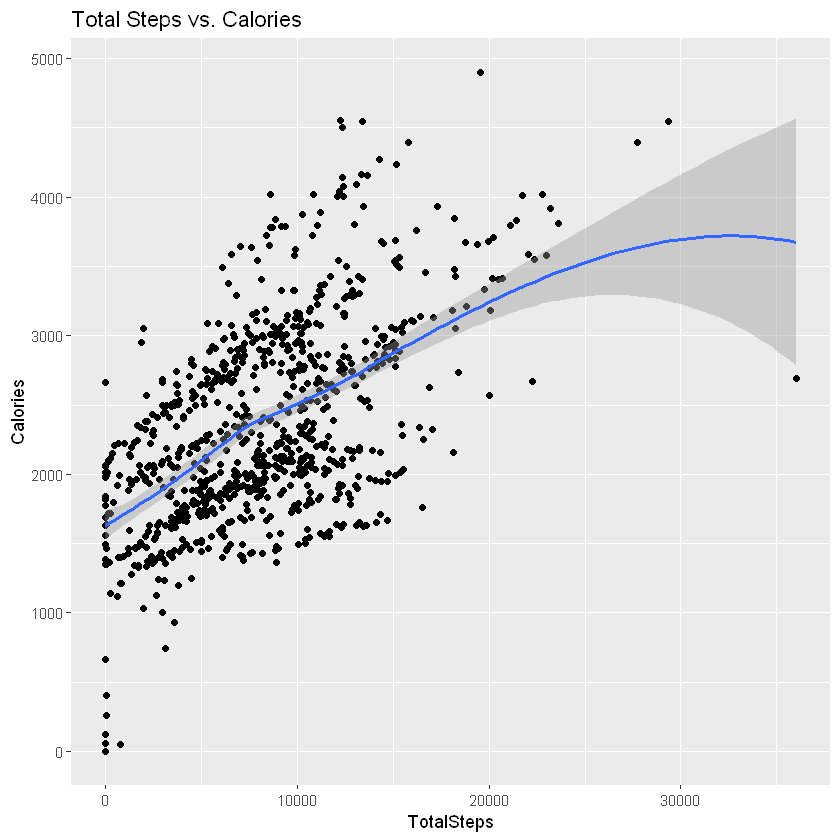

In [38]:
ggplot(data = daily_activity, aes(x = TotalSteps, y = Calories)) + geom_point() + geom_smooth() + labs(title = "Total Steps vs. Calories")

# #2.6 Act 

After analyzing the given data, the fitbit fitness tracker from 30 users, I can summarize and give the recomendation following by:<br>
1. Average taken step per day is around 7638 steps that below the recomedation from CDC which recomend to walk 8000 step or more, Bellabeat may notify user to go to walk inorder to reach the minimum goal.
2. The majority of sample is sedentary, Bellabeat shoud alert the user to be more active during the day.
3. The data from fitbit didn't show sleep state in hour, Bellabeat should provide sleep state and sleep quality to user and help them change their behavior to increase slepp quality
4. On application, Bellabeat should give some suggestion about the meal that match the calories their burned
5. Bellabeat should provide some campagne to trig the user to walk more step other than Saturday
